In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

BASE_DIR = '/kaggle/input/mammography-breast-cancer-detection'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')


train_0_files = os.listdir(os.path.join(TRAIN_DIR, '0'))
train_1_files = os.listdir(os.path.join(TRAIN_DIR, '1'))
test_files = os.listdir(TEST_DIR)


print(f"Eğitim setindeki kansersiz görüntü sayısı (0): {len(train_0_files)}")
print(f"Eğitim setindeki kanserli görüntü sayısı (1): {len(train_1_files)}")
print(f"Test setindeki görüntü sayısı: {len(test_files)}")


Eğitim setindeki kansersiz görüntü sayısı (0): 53548
Eğitim setindeki kanserli görüntü sayısı (1): 1158
Test setindeki görüntü sayısı: 4


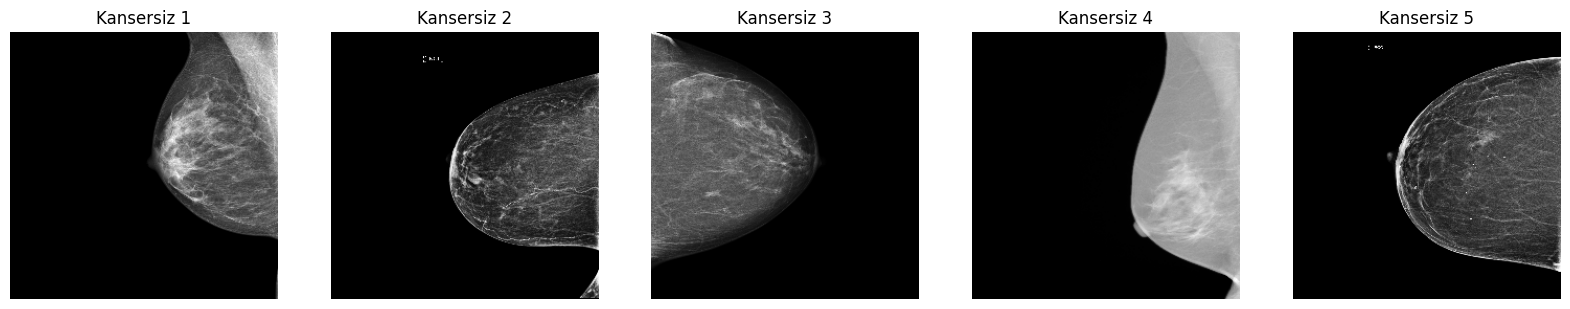

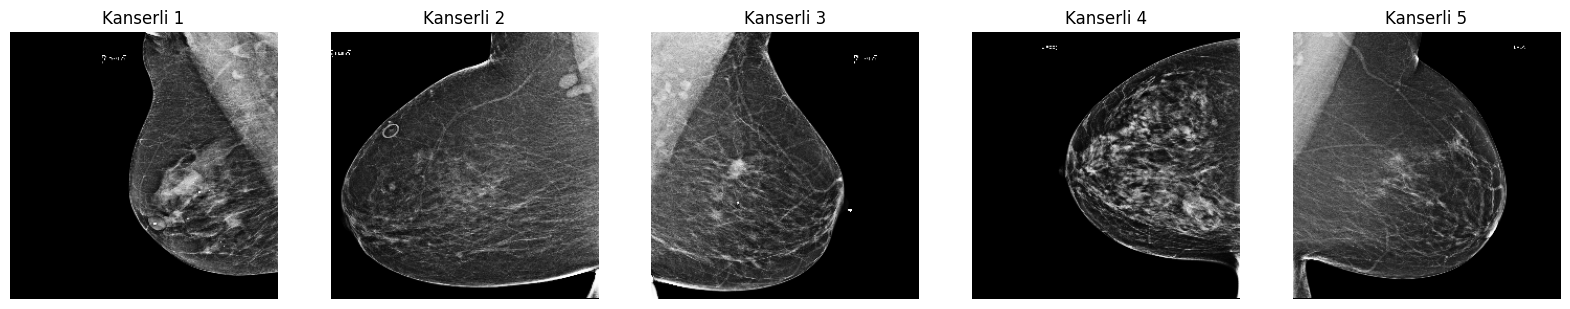

In [2]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from PIL import Image
import os
import random


BASE_DIR = '/kaggle/input/mammography-breast-cancer-detection'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TRAIN_0_DIR = os.path.join(TRAIN_DIR, '0')
TRAIN_1_DIR = os.path.join(TRAIN_DIR, '1')


def visualize_random_images(image_dir, title, num_images=5):
    plt.figure(figsize=(20, 4))
    image_files = os.listdir(image_dir)
    random_images = random.sample(image_files, num_images)
    
    for i, image_file in enumerate(random_images):
        img_path = os.path.join(image_dir, image_file)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.show()


visualize_random_images(TRAIN_0_DIR, 'Kansersiz')
visualize_random_images(TRAIN_1_DIR, 'Kanserli')


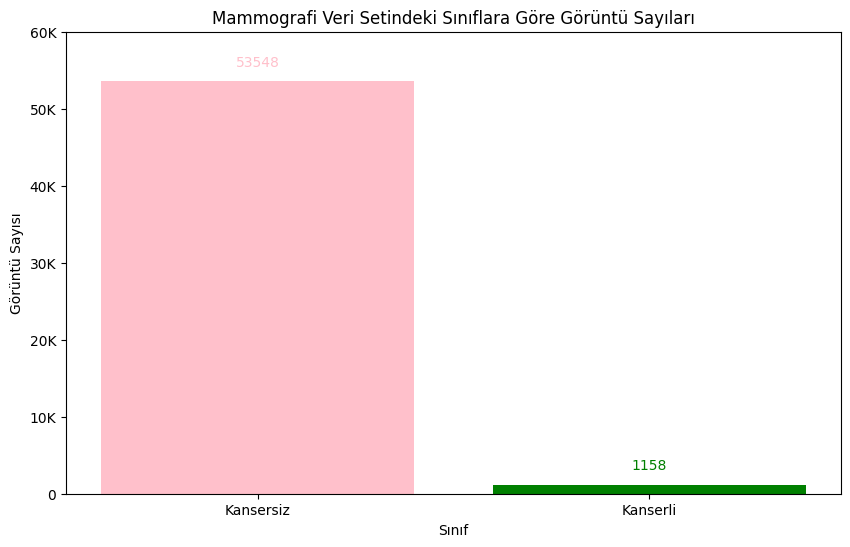

In [3]:
import matplotlib.pyplot as plt


non_cancer_count = 53548
cancer_count = 1158


plt.figure(figsize=(10, 6))
plt.bar('Kansersiz', non_cancer_count, color='pink')
plt.bar('Kanserli', cancer_count, color='green')
plt.xlabel('Sınıf')
plt.ylabel('Görüntü Sayısı')
plt.title('Mammografi Veri Setindeki Sınıflara Göre Görüntü Sayıları')
plt.xticks([0, 1], ['Kansersiz', 'Kanserli'])
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000], ['0', '10K', '20K', '30K', '40K', '50K', '60K'])


plt.text(0, non_cancer_count + 2000, f'{non_cancer_count}', ha='center', color='pink')
plt.text(1, cancer_count + 2000, f'{cancer_count}', ha='center', color='green')

plt.show()


In [4]:

print("\nİlk beş kansersiz (0) görüntünün boyutları:")
for i, file in enumerate(train_0_files[:5]):
    image_path = os.path.join(TRAIN_DIR, '0', file)
    with Image.open(image_path) as img:
        print(f"{i+1}. görüntü: {img.size}")


print("\nİlk beş kanserli (1) görüntünün boyutları:")
for i, file in enumerate(train_1_files[:5]):
    image_path = os.path.join(TRAIN_DIR, '1', file)
    with Image.open(image_path) as img:
        print(f"{i+1}. görüntü: {img.size}")


print("\nİlk beş test görüntüsünün boyutları:")
for i, file in enumerate(test_files[:5]):
    image_path = os.path.join(TEST_DIR, file)
    with Image.open(image_path) as img:
        print(f"{i+1}. görüntü: {img.size}")





İlk beş kansersiz (0) görüntünün boyutları:
1. görüntü: (256, 256)
2. görüntü: (256, 256)
3. görüntü: (256, 256)
4. görüntü: (256, 256)
5. görüntü: (256, 256)

İlk beş kanserli (1) görüntünün boyutları:
1. görüntü: (256, 256)
2. görüntü: (256, 256)
3. görüntü: (256, 256)
4. görüntü: (256, 256)
5. görüntü: (256, 256)

İlk beş test görüntüsünün boyutları:
1. görüntü: (256, 256)
2. görüntü: (256, 256)
3. görüntü: (256, 256)
4. görüntü: (256, 256)


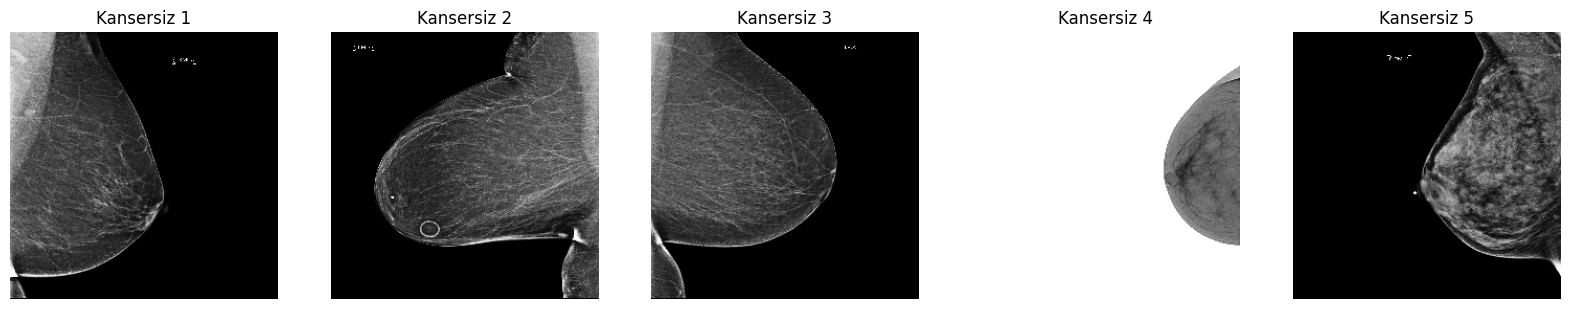

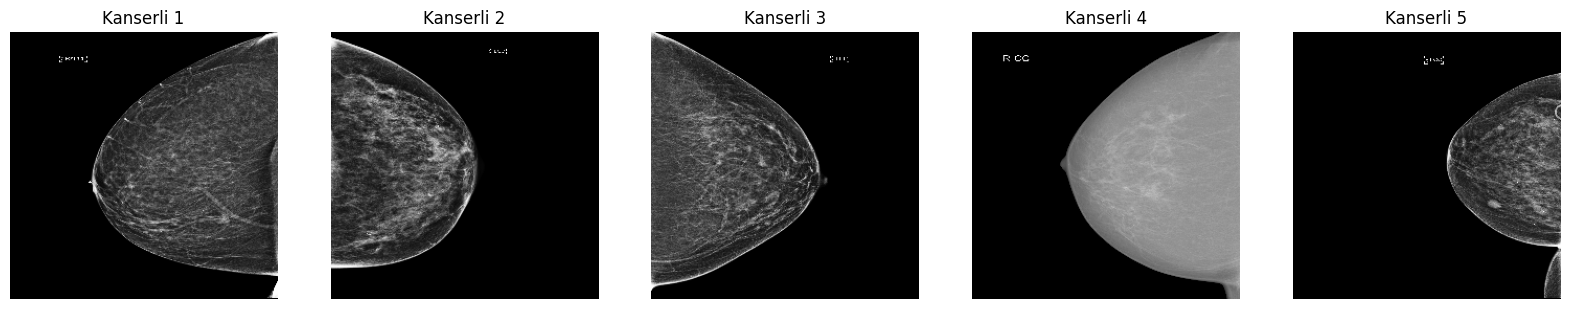

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import random

BASE_DIR = '/kaggle/input/mammography-breast-cancer-detection'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TRAIN_0_DIR = os.path.join(TRAIN_DIR, '0')
TRAIN_1_DIR = os.path.join(TRAIN_DIR, '1')


def visualize_random_images(image_dir, title, num_images=5):
    plt.figure(figsize=(20, 4))
    image_files = os.listdir(image_dir)
    random_images = random.sample(image_files, num_images)
    
    for i, image_file in enumerate(random_images):
        img_path = os.path.join(image_dir, image_file)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.show()


visualize_random_images(TRAIN_0_DIR, 'Kansersiz')


visualize_random_images(TRAIN_1_DIR, 'Kanserli')

In [6]:
# Kaggle working dizinindeki dosyaları kontrol etme
working_dir = '/kaggle/working'
print("Working dizinindeki dosyalar:", os.listdir(working_dir))


Working dizinindeki dosyalar: ['.virtual_documents']


NameError: name 'equilibrated_train_dir' is not defined

In [7]:
import os
import shutil
import random


source_dir_0 = '/kaggle/input/mammography-breast-cancer-detection/train/0'
source_dir_1 = '/kaggle/input/mammography-breast-cancer-detection/train/1'
destination_dir = '/kaggle/working/equilibrated_train'


destination_dir_0 = os.path.join(destination_dir, '0')
destination_dir_1 = os.path.join(destination_dir, '1')


os.makedirs(destination_dir_0, exist_ok=True)
os.makedirs(destination_dir_1, exist_ok=True)

num_images = min(len(os.listdir(source_dir_0)), len(os.listdir(source_dir_1)))

selected_0_files = random.sample(os.listdir(source_dir_0), num_images)
for file in selected_0_files:
    src_path = os.path.join(source_dir_0, file)
    dst_path = os.path.join(destination_dir_0, file)
    shutil.copy(src_path, dst_path)

selected_1_files = random.sample(os.listdir(source_dir_1), num_images)
for file in selected_1_files:
    src_path = os.path.join(source_dir_1, file)
    dst_path = os.path.join(destination_dir_1, file)
    shutil.copy(src_path, dst_path)

print(f"Kansersiz görüntüler: {len(selected_0_files)}")
print(f"Kanserli görüntüler: {len(selected_1_files)}")


Kansersiz görüntüler: 1158
Kanserli görüntüler: 1158


In [8]:
import os
from PIL import Image
from torchvision import transforms

train_0 = '/kaggle/working/equilibrated_train/0'
train_1 = '/kaggle/working/equilibrated_train/1'
augmentation = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2),
    transforms.ToTensor(),
    transforms.ToPILImage()
])

for file in os.listdir(train_0):
    image_path = os.path.join(train_0, file)
    with Image.open(image_path) as img:
        augmented_img = augmentation(img)
        augmented_img.save(os.path.join(train_0, f'aug_{file}')) 
        
for file in os.listdir(train_1):
    image_path = os.path.join(train_1, file)
    with Image.open(image_path) as img:
        augmented_img = augmentation(img)
        augmented_img.save(os.path.join(train_1, f'aug_{file}')) 


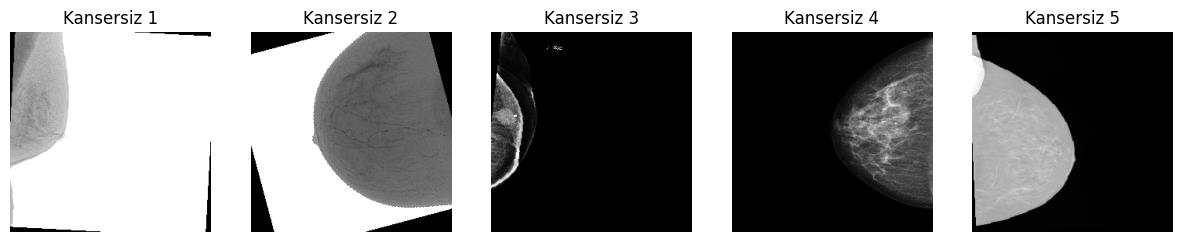

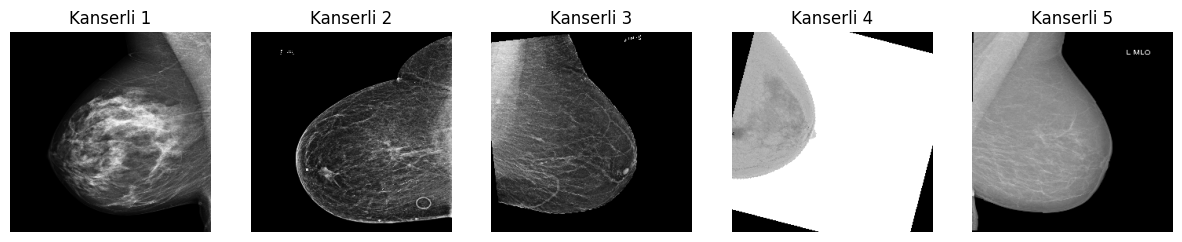

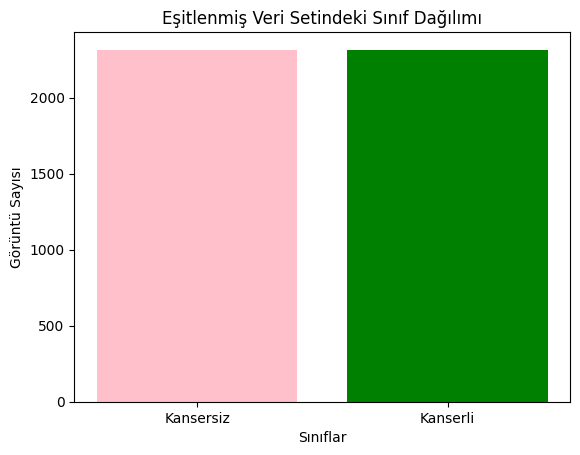

In [9]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image


equilibrated_train_dir = '/kaggle/working/equilibrated_train'


class_0_dir = os.path.join(equilibrated_train_dir, '0')
class_1_dir = os.path.join(equilibrated_train_dir, '1')


random_0_images = random.sample(os.listdir(class_0_dir), 5)
random_1_images = random.sample(os.listdir(class_1_dir), 5)


def visualize_images(image_paths, title):
    plt.figure(figsize=(15, 3))
    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.show()


visualize_images([os.path.join(class_0_dir, img) for img in random_0_images], "Kansersiz")
visualize_images([os.path.join(class_1_dir, img) for img in random_1_images], "Kanserli")


num_images_0 = len(os.listdir(class_0_dir))
num_images_1 = len(os.listdir(class_1_dir))

plt.bar(['Kansersiz', 'Kanserli'], [num_images_0, num_images_1], color=['pink', 'green'])
plt.xlabel('Sınıflar')
plt.ylabel('Görüntü Sayısı')
plt.title('Eşitlenmiş Veri Setindeki Sınıf Dağılımı')
plt.show()


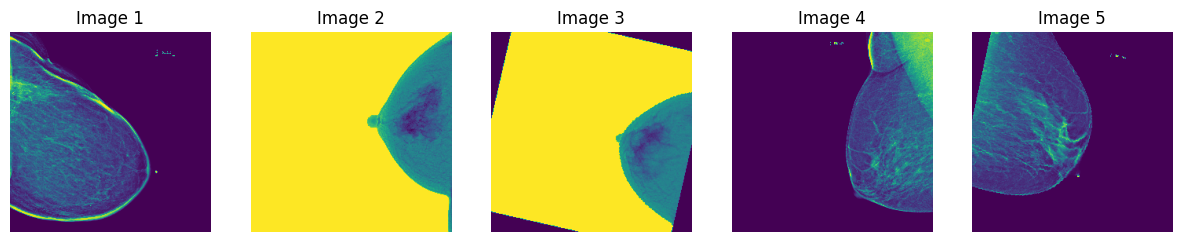

In [10]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image


WORKING_DIR = '/kaggle/working/equilibrated_train/0'

image_files = [f for f in os.listdir(WORKING_DIR) if f.endswith('.png')]
random_images = random.sample(image_files, 5)

plt.figure(figsize=(15, 7))
for i, image_file in enumerate(random_images):
    image_path = os.path.join(WORKING_DIR, image_file)
    image = Image.open(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(f"Image {i + 1}")
    plt.axis('off')

plt.show()

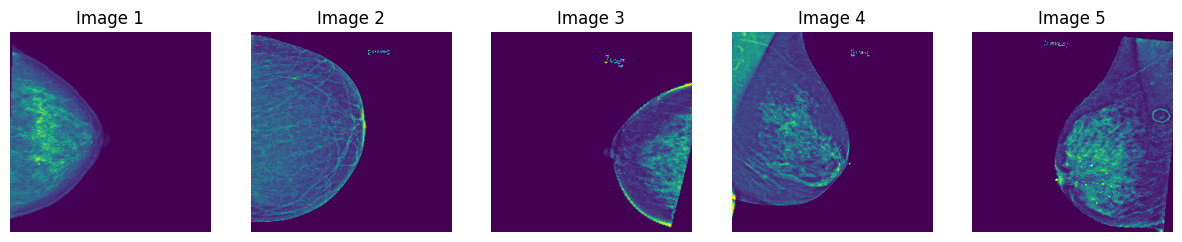

In [11]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image


WORKING_DIR = '/kaggle/working/equilibrated_train/1'


image_files = [f for f in os.listdir(WORKING_DIR) if f.endswith('.png')]

random_images = random.sample(image_files, 5)

plt.figure(figsize=(15, 7))
for i, image_file in enumerate(random_images):
    image_path = os.path.join(WORKING_DIR, image_file)
    image = Image.open(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(f"Image {i + 1}")
    plt.axis('off')

plt.show()

NameError: name 'nn' is not defined

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time


class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)

        return x

model = EnhancedCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_dir = '/kaggle/working/equilibrated_train'
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def train_model(model, criterion, optimizer, num_epochs=5):
    start_time = time.time()
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}')

    time_elapsed = time.time() - start_time
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

train_model(model, criterion, optimizer, num_epochs=5)


Epoch 0/4, Loss: 0.7023, Acc: 0.5212
Epoch 1/4, Loss: 0.6889, Acc: 0.5477
Epoch 2/4, Loss: 0.6838, Acc: 0.5542
Epoch 3/4, Loss: 0.6859, Acc: 0.5443
Epoch 4/4, Loss: 0.6865, Acc: 0.5462
Training complete in 13m 47s


In [14]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_filters(model):
    layers = [model.conv1, model.conv2, model.conv3, model.conv4]
    fig, axes = plt.subplots(nrows=len(layers), ncols=1, figsize=(6, 6))
    
    
    for ax, layer in zip(axes, layers):
        weights = layer.weight.data.numpy()
        filter_grid = np.transpose(weights, (0, 2, 3, 1)) 
        ax.imshow(grid_of_filters(filter_grid), interpolation='none')
        ax.axis('off')
    plt.show()


def grid_of_filters(filter_list):

    num_filters = filter_list.shape[0]
    

    filter_height = filter_list.shape[1]
    filter_width = filter_list.shape[2]
    

    grid = np.zeros((filter_height, num_filters * filter_width))
    

    for i, filter in enumerate(filter_list):
        grid[:, i * filter_width : (i + 1) * filter_width] = filter[:, :, 0]
    
    return grid

# Modelimin ağır
visualize_filters(model, train_loader, 'conv1', num_maps=)
visualize_feature_maps(model, train_loader, 'conv2', num_maps=5)
visualize_feature_maps(model, train_loader, 'conv3', num_maps=5)
visualize_feature_maps(model, train_loader, 'conv4', num_maps=5)


TypeError: visualize_filters() takes 1 positional argument but 3 were given

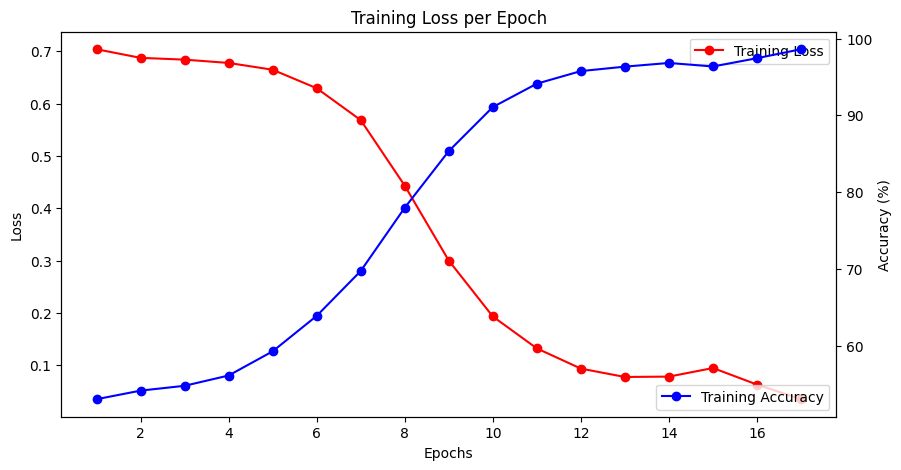

In [18]:
import matplotlib.pyplot as plt


epochs = list(range(1, 18))
loss_values = [0.7039, 0.6874, 0.6840, 0.6777, 0.6647, 0.6294, 0.5685, 0.4432, 0.3001, 0.1933, 0.1323, 0.0937, 0.0777, 0.0784, 0.0948, 0.0632, 0.0352]
accuracy_values = [53.00, 54.12, 54.75, 56.09, 59.24, 63.86, 69.71, 77.96, 85.34, 91.08, 94.13, 95.77, 96.35, 96.83, 96.37, 97.45, 98.62]


plt.figure(figsize=(10, 5))


plt.plot(epochs, loss_values, label='Training Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()


plt.twinx()  
plt.plot(epochs, accuracy_values, label='Training Accuracy', color='blue', marker='o')
plt.ylabel('Accuracy (%)')
plt.legend(loc='lower right')


plt.show()


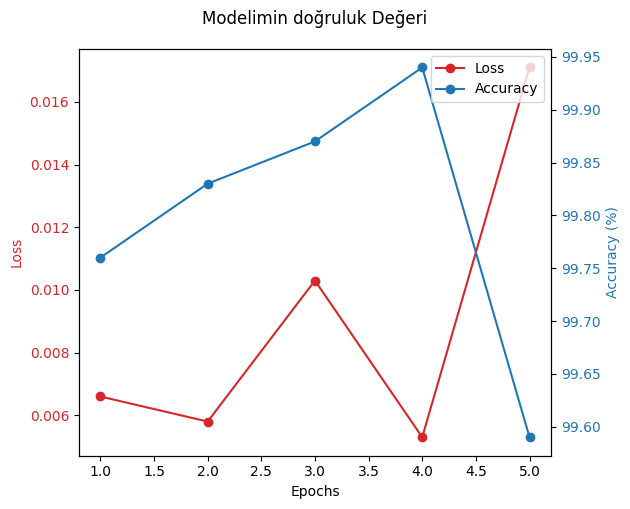

In [5]:
import matplotlib.pyplot as plt


epochs = list(range(1, 6))


loss_values = [0.0066, 0.0058, 0.0103, 0.0053, 0.0171]
accuracy_values = [99.76, 99.83, 99.87, 99.94, 99.59]


fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, loss_values, color=color, marker='o', label='Loss')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Accuracy (%)', color=color)
ax2.plot(epochs, accuracy_values, color=color, marker='o', label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  
fig.suptitle('Modelimin doğruluk Değeri', y=1.05)
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()


In [1]:
def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = 100 * correct / total
    return avg_loss, accuracy

train_model(model, criterion, optimizer, num_epochs=5)
val_loss, val_accuracy = evaluate_model(model, val_loader, criterion)
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)

print(f'Doğrulama Seti Kaybı: {val_loss:.4f}, Doğruluk: {val_accuracy:.2f}%')
print(f'Test Seti Kaybı: {test_loss:.4f}, Doğruluk: {test_accuracy:.2f}%')


NameError: name 'train_model' is not defined

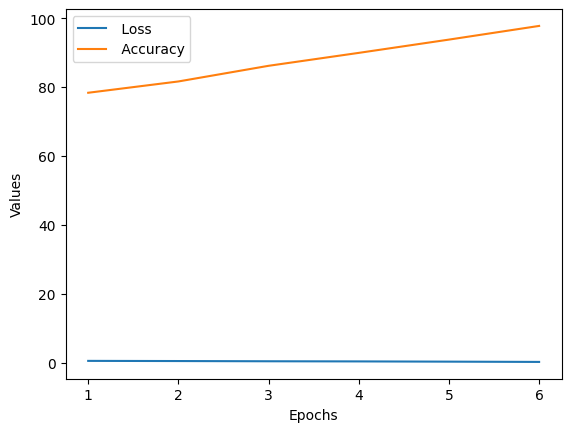

In [2]:
def visualize_test_images_with_predictions(test_loader, model, device, num_images=5):
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].cpu().permute(1, 2, 0))
        plt.title(f'Gerçek: {labels[i].item()}, Tahmin: {preds[i].item()}')
        plt.axis('off')
    plt.show()

visualize_test_images_with_predictions(test_loader, model, device)


NameError: name 'test_loader' is not defined

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, data_loader, device):
    all_preds = torch.tensor([])
    all_labels = torch.tensor([])
    model.eval()

    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds = torch.cat((all_preds, preds.cpu()), dim=0)
            all_labels = torch.cat((all_labels, labels.cpu()), dim=0)

    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Tahminler')
    plt.ylabel('Gerçek Değerler')
    plt.show()

plot_confusion_matrix(model, test_loader, device)


NameError: name 'test_loader' is not defined

In [ ]:
import pandas as pd


class_counts = pd.Series(train_dataset.targets).value_counts().sort_index()

class_counts.plot(kind='bar')
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Görüntü Sayısı')
plt.xticks(ticks=range(len(class_counts)), labels=train_dataset.classes)
plt.show()


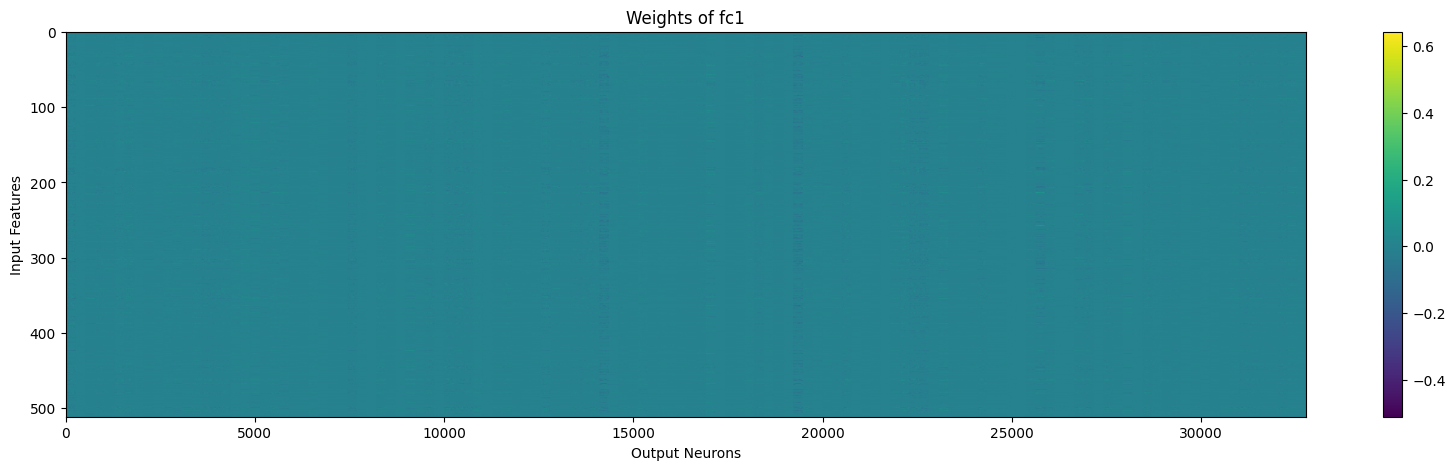

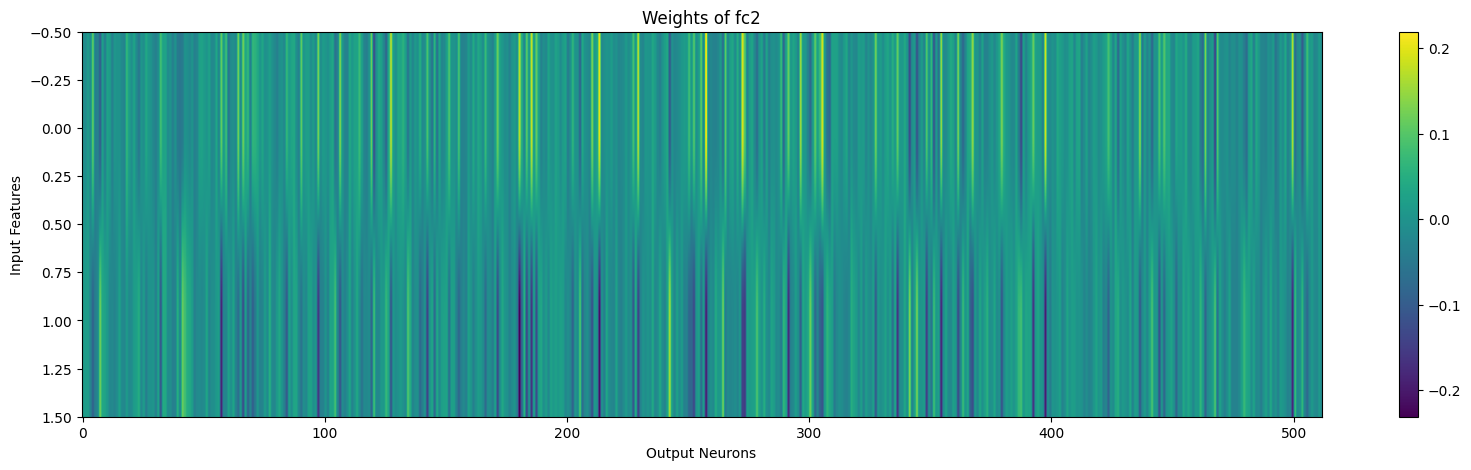

In [32]:
def visualize_fc_layer_weights(model, layer_name):
 
    for name, param in model.named_parameters():
        if name == f"{layer_name}.weight":
            weights = param.data
            break

    weights = weights.cpu().numpy()

    plt.figure(figsize=(20, 5))
    plt.imshow(weights, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(f'Weights of {layer_name}')
    plt.xlabel('Output Neurons')
    plt.ylabel('Input Features')
    plt.show()

visualize_fc_layer_weights(model, 'fc1')
visualize_fc_layer_weights(model, 'fc2')


In [2]:
def visualize_feature_maps(model, dataloader, layer_name, num_maps=5):
   
    model.eval()
    images, _ = next(iter(dataloader))
    images = images.to(device)
    
    x = images
   
    for name, layer in model.named_children():
        if name == layer_name:
            
            with torch.no_grad():
                x = layer(x)
            break
        else:
            with torch.no_grad():
                x = layer(x)
    
   
    size = x.size(2)

    plt.figure(figsize=(25, 5))
    for i in range(num_maps):
        ax = plt.subplot(1, num_maps, i + 1)
        ax.set_title(f'Feature Map {i+1}')
        plt.imshow(x[0, i].cpu().detach().numpy(), cmap='viridis')
        plt.axis('off')
    plt.show()
visualize_feature_maps(model, train_loader, 'conv1', num_maps=16)
visualize_feature_maps(model, train_loader, 'conv2', num_maps=32)
visualize_feature_maps(model, train_loader, 'conv3', num_maps=64)
visualize_feature_maps(model, train_loader, 'conv4', num_maps=128)

NameError: name 'model' is not defined

In [1]:
import matplotlib.pyplot as plt

# Modelin katmanlarının özellik haritalarını görselleştirme fonksiyonu
def visualize_feature_maps(model, dataloader, layer_names, num_maps=5):
    model.eval()  # Modeli değerlendirme moduna al
    
    images, _ = next(iter(dataloader))  # DataLoader'dan bir batch al
    images = images.to(device)  # Görüntüleri cihaza yükle

    # Modeldeki her bir katman için
    for layer_name in layer_names:
        x = images  # Giriş görüntüsünü kullanarak başla
        for name, layer in model.named_children():
            x = layer(x)  # Katmanı uygula
            if name == layer_name:
                break  # Eğer hedef katmana ulaşıldıysa döngüyü kır

        # Özellik haritalarının boyutlarını al
        size = x.size(2)
        
        # Özellik haritalarından rastgele seçilenleri görselleştir
        plt.figure(figsize=(25, 5))
        for i in range(num_maps):
            ax = plt.subplot(1, num_maps, i + 1)
            ax.set_title(f'{layer_name} Feature Map {i+1}')
            feature_map = x[0, i].cpu().detach().numpy()
            plt.imshow(feature_map, cmap='viridis', interpolation='nearest')
            plt.axis('off')
        plt.show()

# Modelinizdeki katmanların isimlerini bir liste olarak hazırlayın
layer_names = ['conv1', 'conv2', 'conv3', 'conv4']

# Görselleştirme fonksiyonunu çağırın
visualize_feature_maps(model, train_loader, layer_names)


NameError: name 'model' is not defined

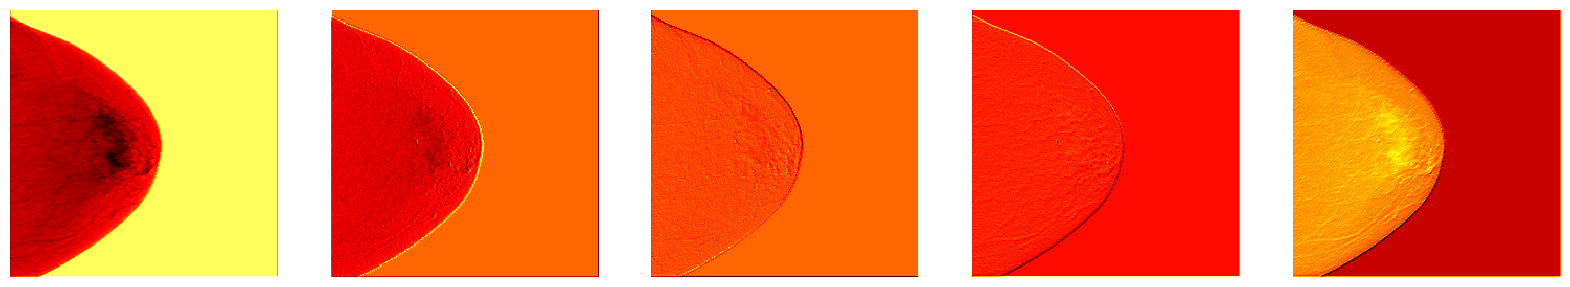

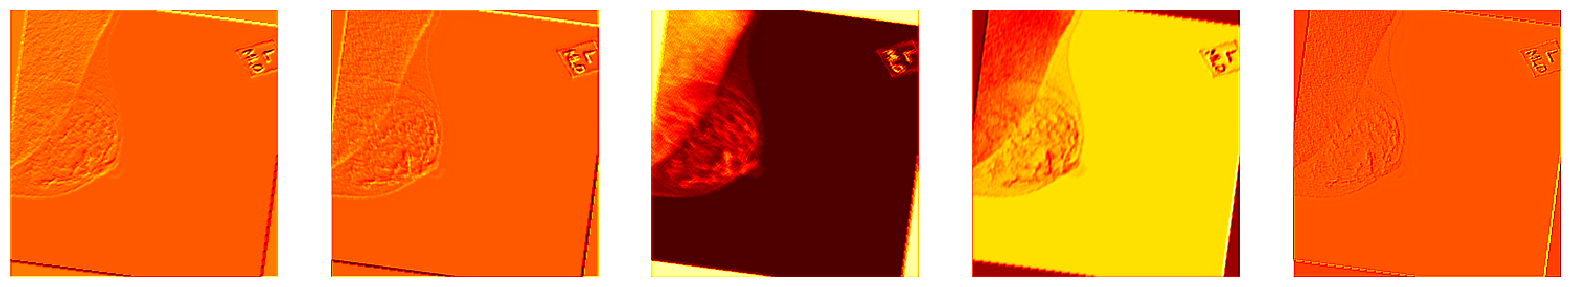

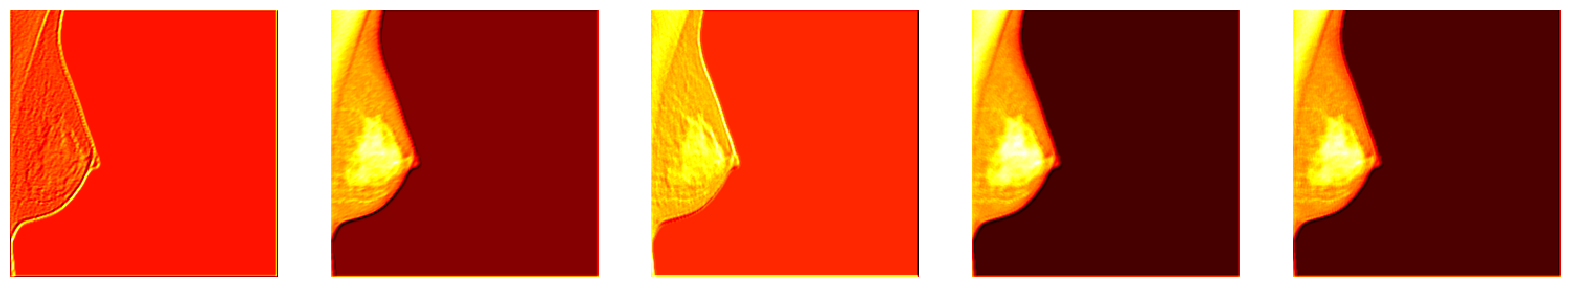

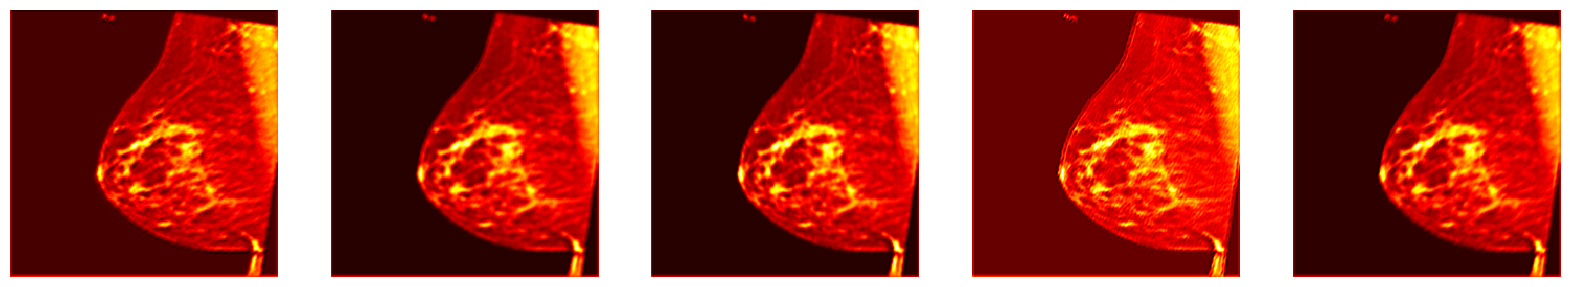

In [25]:
import matplotlib.pyplot as plt
import torch

def visualize_feature_maps(model, loader, selected_layer, num_maps=5):
    model.eval()
    with torch.no_grad():
     
        images, _ = next(iter(loader))
        images = images.to(device)

  
        x = images
        for name, layer in model.named_children():
            x = layer(x)
            if name == selected_layer:
                break

  
        size = x.size(2)

   
        fig, axes = plt.subplots(1, num_maps, figsize=(20, 5))
        for i, ax in enumerate(axes):
            ax.imshow(x[0, i].cpu().squeeze(), cmap='hot', interpolation='nearest')
            ax.axis('off')
        plt.show()


visualize_feature_maps(model, train_loader, 'conv1')
visualize_feature_maps(model, train_loader, 'conv2')
visualize_feature_maps(model, train_loader, 'conv3')
visualize_feature_maps(model, train_loader, 'conv4')


In [3]:
def visualize_incorrect_predictions(model, loader, device, num_images=5):
    model.eval()
    incorrects = []

    with torch.no_grad():
        for data in loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                if preds[i] != labels[i]:
                    incorrects.append((inputs[i], preds[i], labels[i]))
                    if len(incorrects) == num_images:
                        break
            if len(incorrects) == num_images:
                break

    plt.figure(figsize=(15, 5))
    for i, (input, pred, label) in enumerate(incorrects):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(input.cpu().permute(1, 2, 0))
        plt.title(f'Tahmin: {pred}, Gerçek: {label}')
        plt.axis('off')
    plt.show()

visualize_incorrect_predictions(model, test_loader, device)


NameError: name 'model' is not defined

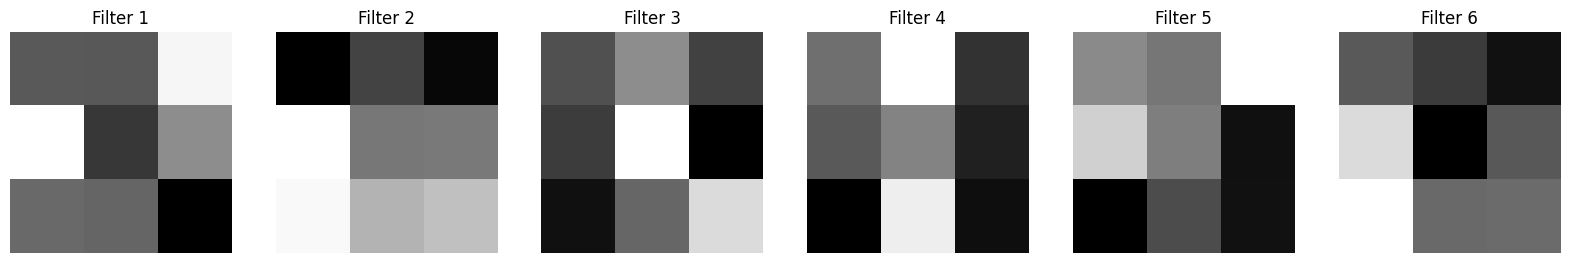

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet()

input_data = torch.rand(1, 1, 32, 32)

output = model(input_data)

filters = model.conv1.weight.data.numpy()

plt.figure(figsize=(20, 17))
for i in range(1, filters.shape[0] + 1):
    plt.subplot(1, filters.shape[0], i)
    plt.imshow(filters[i-1, 0], cmap='gray')
    plt.axis('off')
    plt.title(f'Filter {i}')
plt.show()
